In [19]:
import pandas as pd
df = pd.read_csv('NVDA.csv', encoding='utf-8')
print(df.head())

         Date      Open      High       Low     Close  Adj Close    Volume
0  2000-01-03  0.984375  0.992188  0.919271  0.975260   0.894729  30091200
1  2000-01-04  0.958333  0.960938  0.901042  0.949219   0.870838  30048000
2  2000-01-05  0.921875  0.937500  0.904948  0.917969   0.842169  18835200
3  2000-01-06  0.917969  0.917969  0.822917  0.858073   0.787218  12048000
4  2000-01-07  0.854167  0.881510  0.841146  0.872396   0.800358   7118400


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972 entries, 0 to 5971
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5972 non-null   datetime64[ns]
 1   Open       5972 non-null   float64       
 2   High       5972 non-null   float64       
 3   Low        5972 non-null   float64       
 4   Close      5972 non-null   float64       
 5   Adj Close  5972 non-null   float64       
 6   Volume     5972 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 326.7 KB
None


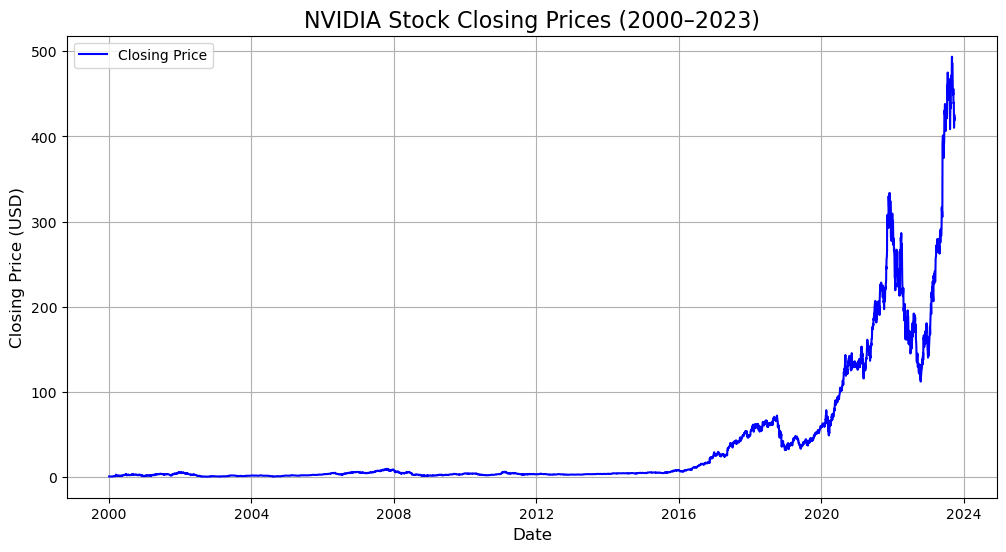

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))


plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')


plt.title('NVIDIA Stock Closing Prices (2000–2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)


plt.legend()


plt.grid(True)
plt.show()

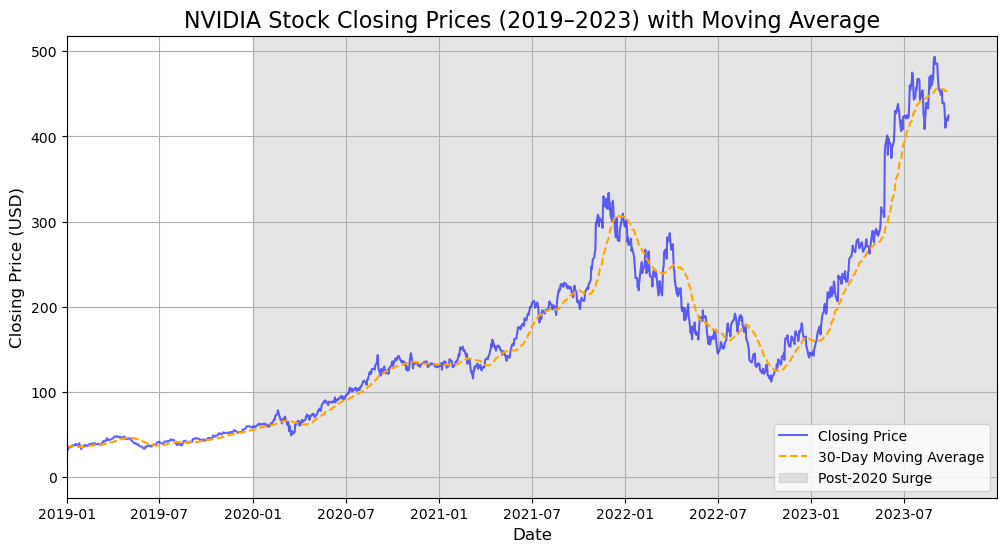

In [25]:
import matplotlib.pyplot as plt


df['Moving_Avg_30'] = df['Close'].rolling(window=30).mean()


plt.figure(figsize=(12, 6))


plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', alpha=0.6)


plt.plot(df['Date'], df['Moving_Avg_30'], label='30-Day Moving Average', color='orange', linestyle='--')


plt.axvspan('2020-01-01', '2023-12-31', color='gray', alpha=0.2, label="Post-2020 Surge")


plt.xlim(pd.to_datetime('2019-01-01'), pd.to_datetime('2023-12-31'))


plt.title('NVIDIA Stock Closing Prices (2019–2023) with Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)


plt.legend()


plt.grid(True)
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller


adf_result = adfuller(df['Close'])

p_value = adf_result[1]


print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {p_value}")


if p_value < 0.05:
    print("The series is likely stationary.")
else:
    print("The series is likely non-stationary.")

ADF Statistic: 1.597766912127022
p-value: 0.9978508608259192
The series is likely non-stationary.


In [29]:
df['Close_diff'] = df['Close'].diff()


df_diff = df.dropna(subset=['Close_diff'])

adf_result_diff = adfuller(df_diff['Close_diff'])


p_value_diff = adf_result_diff[1]


print(f"ADF Statistic (Differenced): {adf_result_diff[0]}")
print(f"p-value (Differenced): {p_value_diff}")


if p_value_diff < 0.05:
    print("The differenced series is likely stationary.")
else:
    print("The differenced series is still likely non-stationary.")

ADF Statistic (Differenced): -10.204154555686005
p-value (Differenced): 5.8640450757536765e-18
The differenced series is likely stationary.


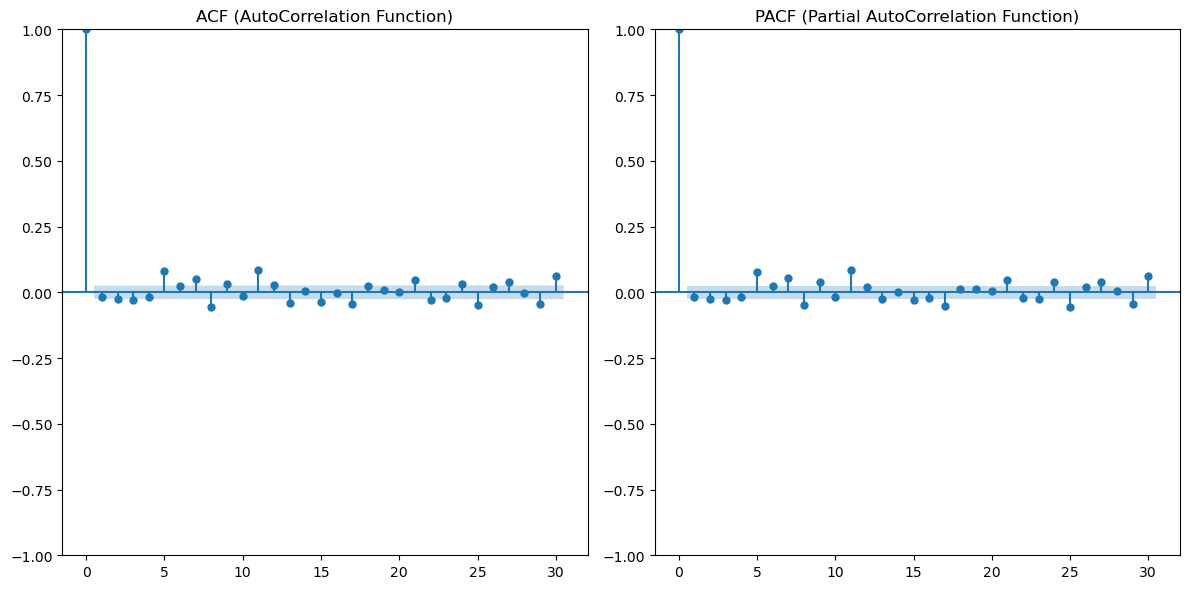

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))


plt.subplot(121)
plot_acf(df_diff['Close_diff'], lags=30, ax=plt.gca())
plt.title('ACF (AutoCorrelation Function)')


plt.subplot(122)
plot_pacf(df_diff['Close_diff'], lags=30, ax=plt.gca())
plt.title('PACF (Partial AutoCorrelation Function)')

plt.tight_layout()
plt.show()

In [33]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df['Close'], order=(1, 1, 1))


fitted_model = model.fit()


print(fitted_model.summary())

C:\Users\Vayun\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vayun\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5972
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14738.714
Date:                Tue, 26 Nov 2024   AIC                          29483.427
Time:                        21:45:29   BIC                          29503.511
Sample:                             0   HQIC                         29490.403
                               - 5972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4417      0.105      4.220      0.000       0.237       0.647
ma.L1         -0.4666      0.103     -4.545      0.000      -0.668      -0.265
sigma2         8.1570      0.021    390.556      0.0

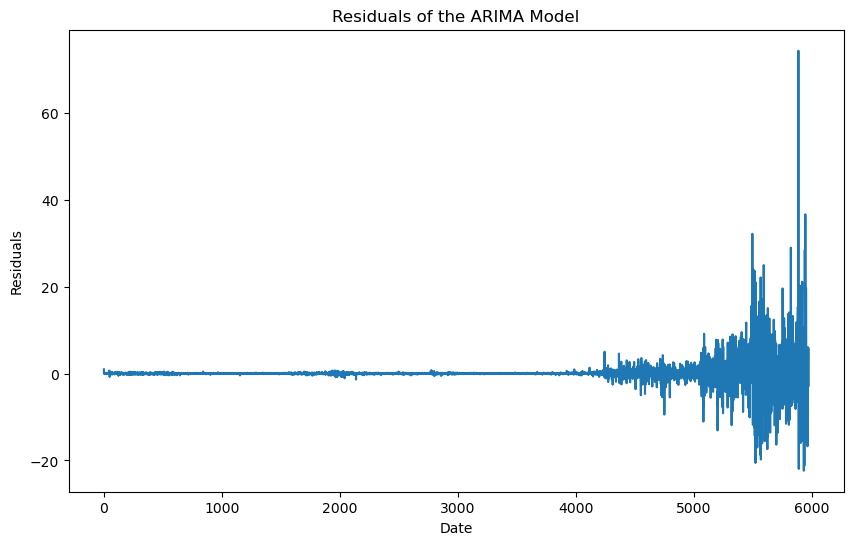

In [35]:
import matplotlib.pyplot as plt


residuals = fitted_model.resid

plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

In [39]:
import pandas as pd


data = pd.read_csv("NVDA.csv")


data['Date'] = pd.to_datetime(data['Date'])


print(data.head())

        Date      Open      High       Low     Close  Adj Close    Volume
0 2000-01-03  0.984375  0.992188  0.919271  0.975260   0.894729  30091200
1 2000-01-04  0.958333  0.960938  0.901042  0.949219   0.870838  30048000
2 2000-01-05  0.921875  0.937500  0.904948  0.917969   0.842169  18835200
3 2000-01-06  0.917969  0.917969  0.822917  0.858073   0.787218  12048000
4 2000-01-07  0.854167  0.881510  0.841146  0.872396   0.800358   7118400


In [41]:
from sklearn.preprocessing import MinMaxScaler


close_prices = data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)

In [45]:
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  
        y.append(data[i, 0]) 
    return np.array(X), np.array(y)

time_step = 60  
X, y = create_sequences(scaled_close_prices, time_step)


X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.3 MB 5.4 MB/s eta 0:01:12
   ---------------------------------------- 0.6/390.3 MB 7.1 MB/s eta 0:00:55
   ---------------------------------------- 0.9/390.3 MB 8.3 MB/s eta 0:00:48
   ---------------------------------------- 1.3/390.3 MB 9.3 MB/s eta 0:00:42
   ---------------------------------------- 1.8/390.3 MB 9.6 MB/s eta 0:00:41
   ---------------------------------------- 2.3/390.3 MB 10.6 MB/s eta 0:00:37
   ---------------------------------------- 3.0/390.3 MB 11.8 MB/s eta 0:00:33
   ---------------------------------------- 3.7/390.3 MB 12.4 MB/s eta 0:00:32
   ---------------------------------------- 4.6/390.3 MB 14.0 MB/s eta 0:00:28
    --------------------------------------- 5.5/390.3 MB 15.4 MB/s eta

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()


model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting


model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(units=1)) 

model.compile(optimizer='adam', loss='mean_squared_error')


model.summary()


C:\Users\Vayun\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 1.4343e-04 - val_loss: 9.9405e-04
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.9042e-05 - val_loss: 0.0012
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.7848e-05 - val_loss: 0.0015
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.5024e-05 - val_loss: 0.0027
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.6448e-05 - val_loss: 0.0017
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.2945e-05 - val_loss: 7.5711e-04
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.4514e-05 - val_loss: 0.0010
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.2084e-05 - val_loss: 0.0018
Epoch 9/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.4020e-05 - val_loss: 0.0022
Epoch 10/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.0881e-05 - val_loss: 0.0021


In [55]:
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9527e-04
Test Loss: 0.00207085651345551


In [57]:
predictions = model.predict(X_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


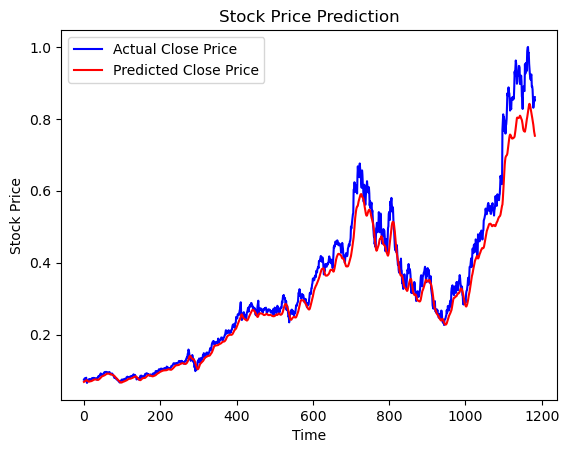

In [59]:
import matplotlib.pyplot as plt
plt.plot(y_test, color='blue', label='Actual Close Price')
plt.plot(predictions, color='red', label='Predicted Close Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [69]:
model.save('stock_prediction_model.keras')
